### Rotation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def bilinear(r,c,img):
    '''
    r: candidate row location
    c: candidate column location
    img: grayscale source image
    
    '''
    
    # check for boundary location
    
    
    lc = int(c)
    rc = lc+1

    tr = int(r)
    br = tr+1

    # weight for right and left
    r_wt = c-lc
    l_wt = rc-c

    # weight for top and bottom
    t_wt = br-r
    b_wt = r-tr
    
    if tr>=0 and br< img.shape[0] and lc>=0 and rc< img.shape[1]:

        a = l_wt*img[tr,lc]+r_wt*img[tr,rc]

        b = l_wt*img[br,lc]+r_wt*img[br,rc]

    # final intensity
        c = a*t_wt+b*b_wt

        return np.uint8(c)
   
    else:
        
        return 0    
        

In [3]:
import matplotlib as mpl


def dispalyImgInActualSize(img):
    dpi = mpl.rcParams['figure.dpi']
    H,W = img.shape # num_rows,num_cols
    
    # What size does the figure need to be in inches to fit the image?
    figsize = W/float(dpi), H/float(dpi) #gives figure size in inches
    
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1]) # fitting original image into the axes
    
    # Hide spines, ticks, etc.
    ax.axis('off')
    
    # display the image
    ax.imshow(img,cmap='gray')
    plt.show

In [4]:
# let us consider an angle to be 45 

a = 45

In [5]:
cos_a = np.cos(np.deg2rad(a))
sin_a = np.sin(np.deg2rad(a))

In [6]:
rot_mat = np.array([[cos_a,-sin_a],[sin_a,cos_a]])
rot_mat

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [7]:
# reading an image

img=plt.imread('./images/lena.jpg')

In [8]:
img.shape

(225, 225)

In [9]:
num_rows = img.shape[0]
num_cols = img.shape[1]

In [10]:
r_max = img.shape[0]
c_max = img.shape[1]

In [11]:
# defining a matrix of the same size as the original image

init_coord = np.array([[0,0],[r_max-1,0],[0,c_max-1],[r_max-1,c_max-1]])
init_coord

array([[  0,   0],
       [224,   0],
       [  0, 224],
       [224, 224]])

In [12]:
# applying the rotation matrix on the end coordinates of the image

In [13]:
# mat.shape

In [14]:
rot_mat.shape

(2, 2)

In [15]:
# final_coord=init_coord.dot(rot_mat)
final_coord = rot_mat.dot(init_coord.T)

mins= final_coord.min(axis=1)
maxs = final_coord.max(axis=1)
print('max is ', maxs)
print('min is ', mins)

min_rows = np.int64(np.floor(mins[0]))
min_cols = np.int64(np.floor(mins[1]))

max_rows=np.int64(np.floor(maxs[0]))
max_cols=np.int64(np.floor(maxs[1]))


print('min rows is: ', min_rows)
print('min cols is ', min_cols)

print('max row is: ', max_rows)
print('max col is: ', max_cols)

max is  [158.39191899 316.78383797]
min is  [-158.39191899    0.        ]
min rows is:  -159
min cols is  0
max row is:  158
max col is:  316


In [16]:
final_coord

array([[ 0.00000000e+00,  1.58391919e+02, -1.58391919e+02,
         2.84217094e-14],
       [ 0.00000000e+00,  1.58391919e+02,  1.58391919e+02,
         3.16783838e+02]])

In [17]:
min_val=final_coord.min(axis=1)
max_val = final_coord.max(axis=1)

In [18]:
min_row = min_val[0]
min_col = min_val[1]

max_row,max_col = max_val[0],max_val[1]

In [19]:
print(' minimum value of the column is:', min_col)
print(' maximum value of the column is:', max_col)

 minimum value of the column is: 0.0
 maximum value of the column is: 316.78383797157323


In [20]:
print(' minimum value of the row is:', min_row)
print(' maximum value of the row is:', max_row)

 minimum value of the row is: -158.39191898578662
 maximum value of the row is: 158.39191898578665


In [21]:
# but we have to convert these values to integer 

min_row = np.int64(np.floor(min_val[0]))
min_col = np.int64(np.floor(min_val[1]))

max_row,max_col = np.int64(np.ceil(max_val[0])),np.int64(np.ceil(max_val[1]))

In [22]:
print(' minimum value of the column is:', min_col)
print(' maximum value of the column is:', max_col)

print(' minimum value of the row is:', min_row)
print(' maximum value of the row is:', max_row)

 minimum value of the column is: 0
 maximum value of the column is: 317
 minimum value of the row is: -159
 maximum value of the row is: 159


In [23]:
# to compute the height of the image
H = max_row-min_row+1
W = max_col-min_col+1

In [24]:
# defining the resulatant image

img_res = np.zeros((H,W),dtype='uint8')


In [25]:
img_res.shape

(319, 318)

In [26]:
# defining the inverse transform

Tinv = np.linalg.inv(rot_mat)

for new_i in range(min_rows,max_rows):
    for new_j in range(min_cols,max_cols):
        p_dash = np.array([new_i,new_j])
        p = Tinv.dot(p_dash) # find corresponding coordinate in original image from the transformed image
        i,j = p[0],p[1]
        
        if i<0 or i>num_rows or j <0 or j>num_cols:
            pass
        else:
            g=bilinear(i,j,img)
            img_res[new_i-min_rows,new_j-min_cols]=g
            
            
            
            

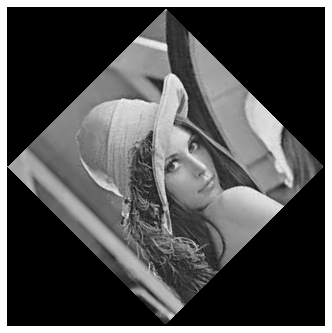

In [27]:
dispalyImgInActualSize(img_res)

In [28]:
def get_rot_mat(angle):
    '''
    angle: the angle of rotation in anticlockwise direction 
    --------------------------------
    
    returns the rotation matrix
    
    '''
    
    sine_a = np.sin(np.deg2rad(angle))
    cose_a = np.cos(np.deg2rad(angle))
    
    rot_mat = np.array([[cose_a,-sine_a],[sine_a,cose_a]])
    return rot_mat
    

In [29]:
def get_scaling_mat(sx,sy):
    '''
    sx: scaling factor in x-axis
    sy: scaling factor in y-axis
    --------------------------------
    
    returns the scaling matrix
    
    '''
    
    
    scaling_mat = np.array([[sx,0],[0,sy]])
    
    return scaling_mat
    

In [30]:
def get_extents(img,trans_mat):
    '''
    input:
    -----------------------------------------------------
    trans_mat: any general transformation matrix e.g 
    
    rotation matrix that does the rotation
    
    output:
    -------------------------------------------------------
    returns the height and width of the output image coordinates
    and the blank output image with the required shape

    '''
    
    num_rows = img.shape[0]
    num_cols = img.shape[1]
    
    a = np.array([0,0])
    b = np.array([num_cols-1,0])
    c = np.array([num_cols-1,num_rows-1])
    d = np.array([0,num_rows-1])
    
    original_coord = np.array([a,b,c,d])
    
    trans_coord=original_coord.dot(trans_mat)
    
    min_col = trans_coord.min(axis=0)[0]
    min_row = trans_coord.min(axis=0)[1]
    max_col = trans_coord.max(axis=0)[0]
    max_row = trans_coord.max(axis=0)[1]
    
    # rounding off the values
    
    min_col = np.int64(np.floor(min_col))
    min_row = np.int64(np.floor(min_row))
    max_col = np.int64(np.ceil(max_col))
    max_row = np.int64(np.ceil(max_row))
    
    
    H = max_row-min_row+1
    W = max_col-min_col+1
    
    
    out_img = np.zeros((H,W), dtype='uint8')
    
    return H,W,min_row,max_row,min_col,max_col,out_img
    
    

    

In [31]:
rot_mat = get_rot_mat(90)
rot_mat

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [32]:
H,W,minr,maxr,minc,maxc,out_blank_img = get_extents(img,rot_mat)

In [33]:
H

226

In [34]:
W

225

In [35]:
out_blank_img.shape

(226, 225)

In [36]:
def rotate(img,img_res,rot_mat,min_rows,max_rows,min_cols,max_cols):
    '''
    Description: this function rotates the given image using the rotation matrix and returns the results
    
    input:
    --------------------------------------------------
    img: source image to be rotated
    img_res = resultant blank image where output of the source image should be mapped to
    rot_mat: rotation matrix
    max_rows, min_rows, max_cols, min_cols are the maximum and minimum values of the image coordinates
    
    output:
    ---------------------------------------------------
    Displays the rotated image
    
    
    '''
    Tinv = np.linalg.inv(rot_mat)

    for new_i in range(min_rows,max_rows):
        for new_j in range(min_cols,max_cols):
            p_dash = np.array([new_i,new_j])
            p = Tinv.dot(p_dash) # find corresponding coordinate in original image from the transformed image
            i,j = p[0],p[1]

            if i<0 or i>num_rows or j <0 or j>num_cols:
                pass
            else:
                g=bilinear(i,j,img)
                
                img_res[new_i-min_rows,new_j-min_cols]=g
    dispalyImgInActualSize(img_res)

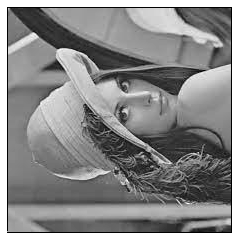

In [37]:
rotate(img,out_blank_img,rot_mat,minr,maxr,minc,maxc)

In [38]:
# the same rotation matrix is capable of performing all the transformations if given the appropriate matrix

def transform(img,img_res,trans_mat,min_rows,max_rows,min_cols,max_cols):
    '''
    
    input:
    --------------------------------------------------
    img: source image to be transformed
    img_res = resultant blank image where output of the source image should be mapped to
    trans_mat: transformation matrix
    max_rows, min_rows, max_cols, min_cols are the maximum and minimum values of the image coordinates
    
    output:
    ---------------------------------------------------
    Displays the transformed image
    
    
    '''
    Tinv = np.linalg.inv(trans_mat)

    for new_i in range(min_rows,max_rows):
        for new_j in range(min_cols,max_cols):
            p_dash = np.array([new_i,new_j])
            p = Tinv.dot(p_dash) # find corresponding coordinate in original image from the transformed image
            i,j = p[0],p[1]

            if i<0 or i>num_rows or j <0 or j>num_cols:
                pass
            else:
                g=bilinear(i,j,img)
                
                img_res[new_i-min_rows,new_j-min_cols]=g
    dispalyImgInActualSize(img_res)

In [39]:
# get the scaling matrix that does the scaling

scaling_mat = get_scaling_mat(2,2)

H,W,min_row,max_row,min_col,max_col,out_img = get_extents(img,scaling_mat)

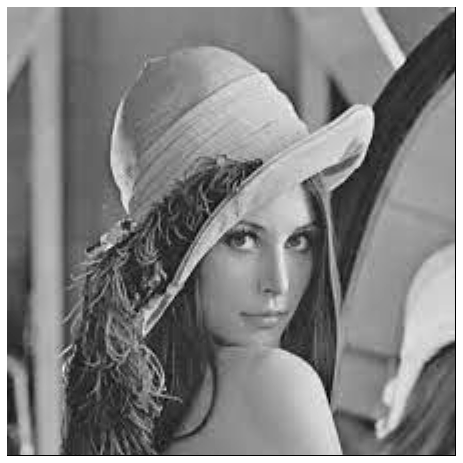

In [40]:
transform(img,out_img,scaling_mat,min_row,max_row,min_col,max_col)

In [41]:
### performing the same rotation of image using the opencv library

In [42]:
# # dividing height and width by 2 to get the center of the image

# height, width = img.shape[:2]

# # get the center coordinates of the image to create the 2D rotation matrix

# center = (width/2, height/2)

# # using cv2.getRotationMatrix2D() to get the rotation matrix

# rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)


# # rotate the image using cv2.warpAffine

# rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))

 

# cv2.imshow('Original image', img)

# cv2.imshow('Rotated image', rotated_image)

# # wait indefinitely, press any key on keyboard to exit

# cv2.waitKey(0)

In [43]:
img.shape[1::-1]

(225, 225)

In [44]:
img.shape

(225, 225)

In [45]:
color_img = plt.imread('./images/color.jpg')

In [46]:
color_img.shape

(700, 750, 3)

In [47]:
color_img.shape[1::-1] # just to get the number of rows and number of columns

(750, 700)

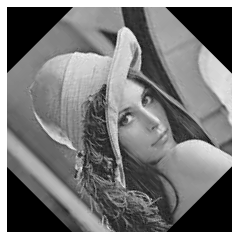

In [48]:
image_center = tuple(np.array(img.shape[1::-1])/2)
rotation_angle = 45
scale = 1.0


rot_mat = cv2.getRotationMatrix2D(image_center,rotation_angle,scale)
i = cv2.warpAffine(img,rot_mat,img.shape[::-1])
# plt.imshow(i,cmap='gray')
dispalyImgInActualSize(i)

In [49]:
image_center

(112.5, 112.5)

### Reflection

In [64]:
ref_mat = np.array([[1,0],[0,-1]]) # that does horizontal transformation
ref_mat


array([[ 1,  0],
       [ 0, -1]])

In [65]:
def get_extents(img,trans_mat):
    '''
    input:
    -----------------------------------------------------
    trans_mat: any general transformation matrix e.g 
    
    rotation matrix that does the rotation
    
    output:
    -------------------------------------------------------
    returns the height and width of the output image coordinates
    and the blank output image with the required shape

    '''
    
    num_rows = img.shape[0]
    num_cols = img.shape[1]
    
    a = np.array([0,0])
    b = np.array([num_cols-1,0])
    c = np.array([num_cols-1,num_rows-1])
    d = np.array([0,num_rows-1])
    
    original_coord = np.array([a,b,c,d])
    
    trans_coord=original_coord.dot(trans_mat)
    
    min_col = trans_coord.min(axis=0)[0]
    min_row = trans_coord.min(axis=0)[1]
    max_col = trans_coord.max(axis=0)[0]
    max_row = trans_coord.max(axis=0)[1]
    
    # rounding off the values
    
    min_col = np.int64(np.floor(min_col))
    min_row = np.int64(np.floor(min_row))
    max_col = np.int64(np.ceil(max_col))
    max_row = np.int64(np.ceil(max_row))
    
    
    H = max_row-min_row+1
    W = max_col-min_col+1
    
    
    out_img = np.zeros((H,W), dtype='uint8')
    
    return min_row,max_row,min_col,max_col,out_img
    
    

    

In [66]:
# the same rotation matrix is capable of performing all the transformations if given the appropriate matrix

def transform(img,trans_mat):
    '''
    
    input:
    --------------------------------------------------
    img: source image to be transformed
    img_res = resultant blank image where output of the source image should be mapped to
    trans_mat: transformation matrix
    max_rows, min_rows, max_cols, min_cols are the maximum and minimum values of the image coordinates
    
    output:
    ---------------------------------------------------
    Displays the transformed image
    
    
    '''
    min_row,max_row,min_col,max_col,out_img=get_extents(img,trans_mat)
    Tinv = np.linalg.inv(trans_mat)

    for new_i in range(min_row,max_row):
        for new_j in range(min_col,max_col):
            p_dash = np.array([new_i,new_j])
            p = Tinv.dot(p_dash) # find corresponding coordinate in original image from the transformed image
            i,j = p[0],p[1]

            if i<0 or i>=num_rows or j <0 or j>=num_cols:
                pass
            else:
                g=bilinear(i,j,img)
                out_img[new_i-min_row,new_j-min_col]=g
    dispalyImgInActualSize(out_img)

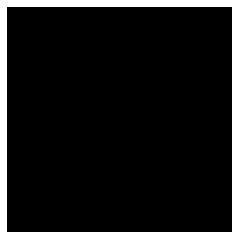

In [67]:
transform(img,ref_mat)

In [68]:
min_row,max_row,min_col,max_col,out_img = get_extents(img,ref_mat)

In [61]:
out_img.shape

(225, 225)

### Shearing

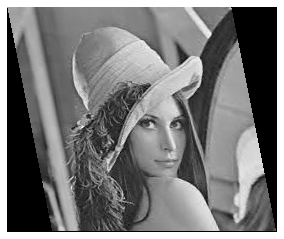

In [71]:
k = 0.2
# performing shear in x_axis
shear_matrix = np.array([[1,0],[k,1]])
transform(img,shear_matrix)

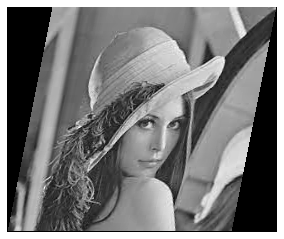

In [74]:
k = -0.2
# performing shear in x_axis
shear_matrix = np.array([[1,0],[k,1]])
transform(img,shear_matrix)

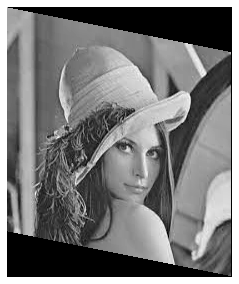

In [72]:
k = 0.2
# performing shear in y_axis
shear_matrix = np.array([[1,k],[0,1]])
transform(img,shear_matrix)

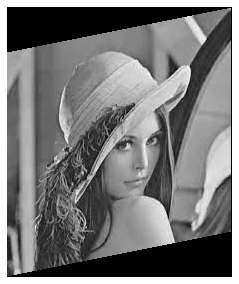

In [73]:
k = -0.2
# performing shear in y_axis
shear_matrix = np.array([[1,k],[0,1]])
transform(img,shear_matrix)